# ２次関数のフィッティング

- 理解したら、後で戻ってくる

In [227]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import torch

np.random.seed(123)
x = np.random.randn(100)
y = x ** 2 + np.random.randn(100) * 0.1

x = torch.tensor(x).float()
y = torch.tensor(y).float()

x_train = x[:50]
x_test  = x[50:]
y_train = y[:50]
y_test  = y[50:]


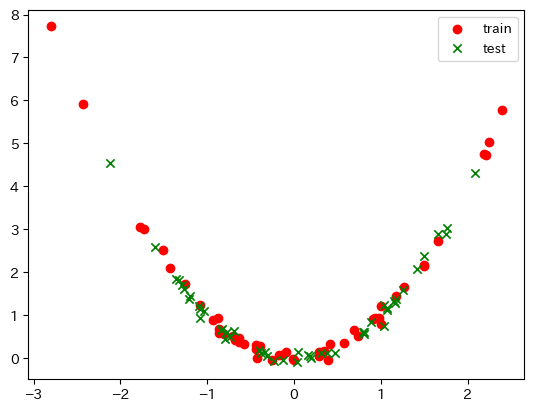

In [228]:
plt.scatter(x_train, y_train, c='r', label='train')
plt.scatter(x_test, y_test, c='g', marker='x', label='test')
plt.legend()

In [229]:
from torch import nn

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        l1 = nn.Linear(n_input, 500)
        l2 = nn.Linear(500, n_output)
        relu = nn.ReLU(inplace=True)
        self.net = nn.Sequential(
            l1,
            relu,
            l2,
            relu,
        )
    def forward(self, x):
        return self.net(x)

net = Net(50, 50)

outputs = net(x_train)


In [230]:
for param in net.named_parameters():
    print(param)

('net.0.weight', Parameter containing:
tensor([[ 0.1243, -0.1047, -0.0443,  ..., -0.1169, -0.0983,  0.0451],
        [-0.0768,  0.0321,  0.0737,  ..., -0.1019, -0.0222,  0.1387],
        [ 0.1376,  0.0023,  0.0682,  ..., -0.1115, -0.0903,  0.0246],
        ...,
        [-0.0426, -0.0057,  0.1195,  ..., -0.0728, -0.1005,  0.0239],
        [-0.0394,  0.0728, -0.0310,  ...,  0.1349,  0.1321,  0.0323],
        [-0.0508, -0.0370,  0.0179,  ..., -0.1180,  0.0822, -0.1338]],
       requires_grad=True))
('net.0.bias', Parameter containing:
tensor([-3.8129e-02,  6.0432e-02,  4.9396e-02,  9.8254e-03,  7.9256e-02,
        -9.9945e-02, -1.0919e-01, -4.2406e-02, -1.2693e-01,  1.2503e-01,
         8.9482e-02, -3.0713e-02, -4.0852e-02, -6.2874e-02, -1.9354e-02,
         3.5170e-02, -1.2501e-01, -2.9943e-02, -3.1794e-02,  2.2841e-02,
        -9.3277e-02,  6.5037e-02, -1.0061e-01,  1.3883e-01, -7.4546e-02,
         4.5907e-02, -6.1328e-02,  1.3991e-01,  1.1404e-01,  8.5552e-02,
         1.1449e-02, -1.

In [231]:
criterion = nn.MSELoss().float()

#loss = criterion(outputs, y_train) / 2.0

#from torchviz import make_dot
#g = make_dot(loss, params=dict(net.named_parameters()))
#display(g)


In [232]:
#loss.backward()

In [233]:
import torch.optim as optim

lr = 0.001
optimizer = optim.SGD(net.parameters(), lr=lr)

#optimizer.step()
#optimizer.zero_grad()

In [234]:
num_epochs = 2000

history = np.array((0, 2))
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(x_train)
    loss = criterion(outputs, y_train) / 2.0
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 100 == 0:
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch / Loss = {epoch} / {loss.item():.5f}')


Epoch / Loss = 0 / 2.35484
Epoch / Loss = 100 / 1.51357
Epoch / Loss = 200 / 0.94533
Epoch / Loss = 300 / 0.59539
Epoch / Loss = 400 / 0.41219
Epoch / Loss = 500 / 0.33009
Epoch / Loss = 600 / 0.29746
Epoch / Loss = 700 / 0.28550
Epoch / Loss = 800 / 0.28136
Epoch / Loss = 900 / 0.27995
Epoch / Loss = 1000 / 0.27949
Epoch / Loss = 1100 / 0.27933
Epoch / Loss = 1200 / 0.27928
Epoch / Loss = 1300 / 0.27926
Epoch / Loss = 1400 / 0.27925
Epoch / Loss = 1500 / 0.27925
Epoch / Loss = 1600 / 0.27925
Epoch / Loss = 1700 / 0.27925
Epoch / Loss = 1800 / 0.27925
Epoch / Loss = 1900 / 0.27925


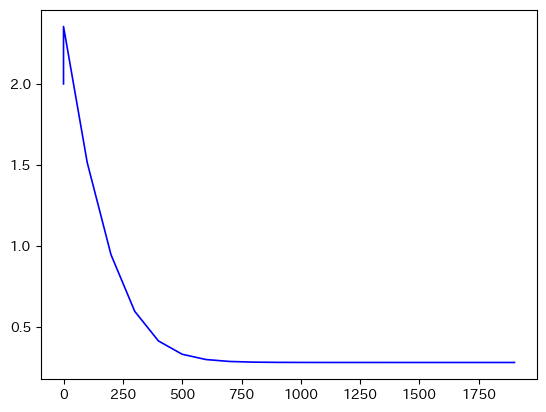

In [235]:
plt.plot(history[:, 0], history[:, 1], 'b')

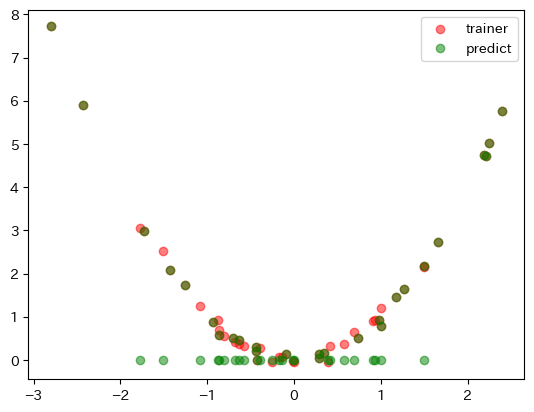

In [236]:
plt.scatter(x_train.data.numpy(), y_train.data.numpy(), c='r', label='trainer', alpha=0.5)
plt.scatter(x_train.data.numpy(), outputs.data.numpy(), c='g', label='predict', alpha=0.5)
plt.legend()

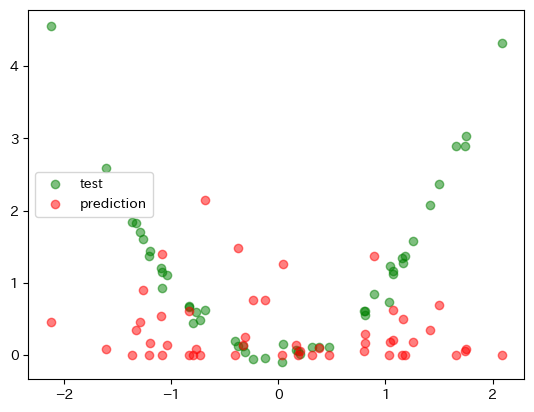

In [237]:
plt.scatter(x_test.data.numpy(), y_test.data.numpy(), c='g', label='test', alpha=0.5)
plt.scatter(x_test.data.numpy(), net(x_test).data.numpy(), c='r', label='prediction', alpha=0.5)
plt.legend()